In [1]:
import pandas as pd
import textblob

# Path hack
import os
# change directory from the current Analysis folder to the top level folder for easier navigation
os.chdir('../')
# confirm we're at top level folder
print(os.getcwd())

# note that the %load_ext autoreload line only needs to be be run once
%load_ext autoreload

/Users/prcork/Georgetown/Spring2023/TimeSeries/ANLY560_website


In [2]:
# import text analysis functions
%autoreload
from _functions import get_reddit_data, text_analysis

Version 7.6.0 of praw is outdated. Version 7.6.1 was released Friday November 11, 2022.


In [3]:
df = pd.read_csv("_data/reddit_top_year_submissions.csv")
# subset to each subreddit
magicTCG = df.query("subreddit=='magicTCG'").copy()
finance = df.query("subreddit=='mtgfinance'").copy()

In [4]:
finance.head()

,submission_id,title,is_self,selftext,ups,upvote_ratio,num_comments,subreddit,date,image,domain
1000,vev8gf,Got this today over some negative TCGPlayer fe...,False,NaN,1124,0.98,327,mtgfinance,2022-06-18,1,redd
1001,yuyuu3,Bank of America confirms Hasbro is overprintin...,False,NaN,1100,0.95,445,mtgfinance,2022-11-14,0,cnbc
1002,ztlrdl,Magic 30th Anniversary Edition compared to Yu-...,False,NaN,1053,0.95,169,mtgfinance,2022-12-23,1,redd
1003,ux1mrs,"i've found it. after long hours of searching, ...",False,NaN,828,0.88,86,mtgfinance,2022-05-24,1,redd
1004,xvtldy,30th Anniversary Secret Lair and Spending Mone...,True,I've played this game since 1995. I've bought ...,794,0.96,348,mtgfinance,2022-10-04,0,reddit


In [6]:
# print top terms for each topic resulting from the LDA model
text_analysis.process_text(finance.title,
                           min_df=6,
                           n_components=9,
                           n_top_words=10)

Topic #0: wotc, lgs, year, standard, product, seal, mtg, 10, mh2, want 

Topic #1: tcgplayer, hasbro, shipping, just, card, bonus, sale, seller, jumpstart, pre 

Topic #2: secret, lair, secret lair, gate, baldur, baldur gate, analysis, wizards, thought, card 

Topic #3: foil, ebay, war, list, going, card, reserved, reserved list, purchase, precon 

Topic #4: new, card, price, wa, mtg, tcg, did, kamigawa, real, capenna 

Topic #5: box, booster, double, 2022, masters, double masters, 30th, dominaria, draft, amazon 

Topic #6: magic, collector, update, warhammer, pack, 40k, buyout, 30, warhammer 40k, ev 

Topic #7: spec, 2x2, weekly, winners, weekly winners, psa, end, finance, buylist, sold 

Topic #8: market, commander, card, time, buy, clb, sealed, think, value, deal 




In [12]:
def getSubjectivity(text):
    return textblob.TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
def getPolarity(text):
    return textblob.TextBlob(text).sentiment.polarity

In [57]:
finance['lem_title'] = text_analysis.lemmatize_documents(finance.title)
finance['subjectivity'] = finance.title.apply(getSubjectivity)
finance['lem_subjectivity'] = finance.lem_title.apply(getSubjectivity)
finance['sub_diff'] = finance['subjectivity'] - finance['lem_subjectivity']

finance['polarity'] = finance.title.apply(getPolarity)
finance['lem_polarity'] = finance.lem_title.apply(getPolarity)
finance['sub_diff'] = finance['subjectivity'] - finance['lem_polarity']

In [58]:
magicTCG['lem_title'] = text_analysis.lemmatize_documents(magicTCG.title)
magicTCG['subjectivity'] = magicTCG.title.apply(getSubjectivity)
magicTCG['lem_subjectivity'] = magicTCG.lem_title.apply(getSubjectivity)
magicTCG['sub_diff'] = magicTCG['subjectivity'] - magicTCG['lem_subjectivity']

magicTCG['polarity'] = magicTCG.title.apply(getPolarity)
magicTCG['lem_polarity'] = magicTCG.lem_title.apply(getPolarity)
magicTCG['sub_diff'] = magicTCG['subjectivity'] - magicTCG['lem_polarity']

<AxesSubplot:>

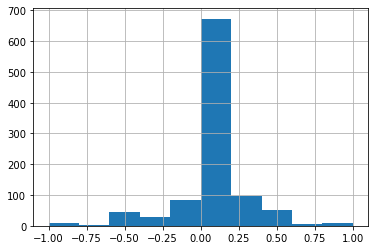

In [59]:
finance.lem_polarity.hist()

<AxesSubplot:>

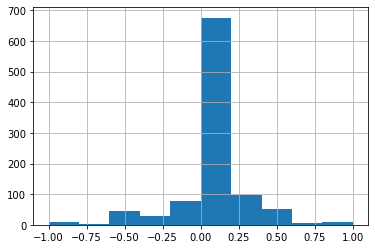

In [60]:
finance.polarity.hist()

In [68]:
finance.date = pd.to_datetime(finance.date)
magicTCG.date = pd.to_datetime(magicTCG.date)

In [69]:
time_finance = finance.groupby('date').mean()
time_magic = magicTCG.groupby('date').mean()

<AxesSubplot:xlabel='date'>

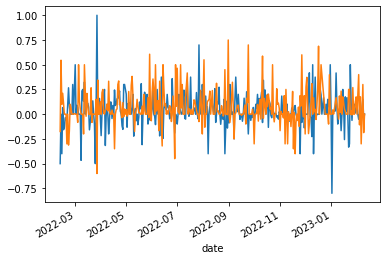

In [74]:
time_finance.lem_polarity.plot()
time_magic.lem_polarity.plot()

<AxesSubplot:xlabel='date'>

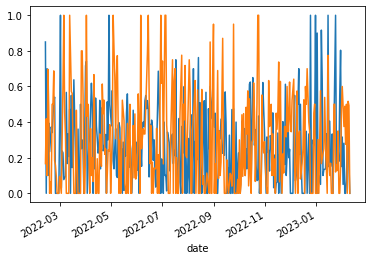

In [75]:
time_finance.lem_subjectivity.plot()
time_magic.lem_subjectivity.plot()